In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
import scipy as sp
import sympy as syp 
import random as rand
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
syp.interactive.printing.init_printing(use_latex= True)

In [4]:
# defining the functions
# pi = np.pi
# A = 0.25
# e = 0.1
# w = (2 * pi) / 10
p = syp.Symbol("p")
x = syp.Symbol("x")
y = syp.Symbol("y")
t = syp.Symbol("t")
f = syp.Symbol("f")
a = syp.Symbol("a")
b = syp.Symbol("b")
e = syp.Symbol("\epsilon")
A = syp.Symbol("A")
w = syp.Symbol("\omega")
pi = syp.Symbol("\pi")
def b(t):
    return 1 - 2 * e * syp.sin(w * t)
def a(t):
    return e *  syp.sin(w*t)
def f(x, t):
    return a(t) * x ** 2 + b(t) * x
def p(x, y, t):
    return A * syp.sin(pi * f(x, t)) * syp.sin(pi * y)
# defining the derivatives/velocity fields
def u(x, y, t):
    return -p(x,y,t).diff(y)
def v(x,y,t):
    return p(x,y,t).diff(x)
display(u(x,y,t), v(x,y,t))

In [2]:
#1
def du(x, y, t, A, e, w):
    pi = np.pi
    return - A * pi * np.sin(pi * (e * (x ** 2)* np.sin(w * t) + x * (-2 * e * np.sin(w *t) +1))) * np.cos(pi * y) 

In [3]:
def dv(x, y, t, A, e, w):
    pi = np.pi
    return A * pi * ((2 * e * np.sin(w*t) - 2 * e * np.sin(w * t) + 1) * np.sin(pi * y) * np.cos(pi * (e * (x ** 2) * np.sin(w*t) + x * (-2 * e * np.sin(w * t) + 1))))

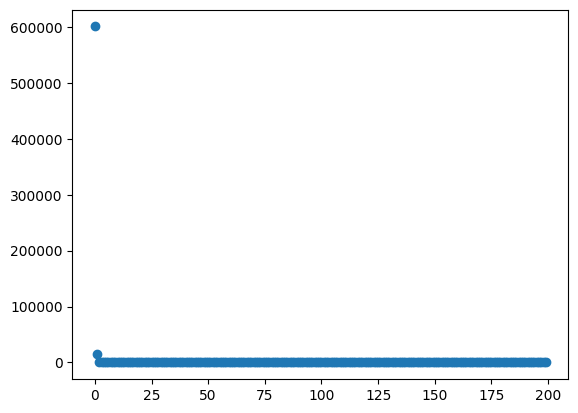

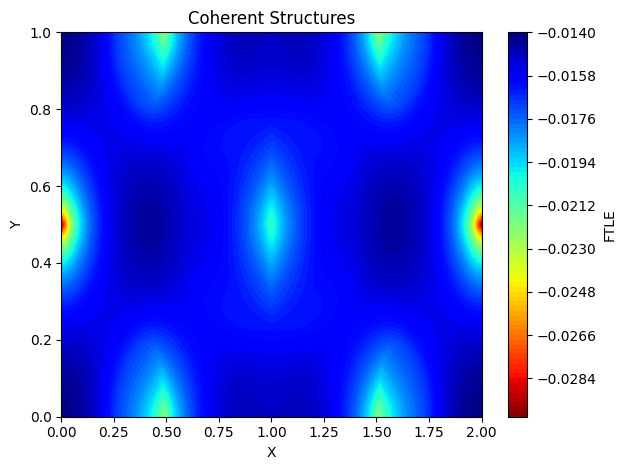

In [49]:
#2
pi = np.pi
A = 0.25
e = 0.1
w = (2 * pi) / 10
N, M, frame = 100, 100, 200
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, M)
X,Y = np.meshgrid(x,y)
t = np.linspace(0, 100, frame)
u = np.empty((len(t), len(X), len(Y)))
v = np.empty((len(t), len(X), len(Y)))

for i in range(frame):
    u[i, :, :] = du(X, Y, t[i], A, e, w)
    v[i, :, :] = dv(X, Y, t[i], A, e, w)

#2
D = np.zeros((2 * N * M, frame))
for i in range(frame):
    D[:N * M, i] = u[i,:,:].reshape(N * M)
    D[N * M:, i] = v[i,:,:].reshape(N * M)

#3
U,S,V = np.linalg.svd(D, full_matrices= False)
plt.scatter(np.arange(len(S**2)), S**2)
plt.show()

# A= U[:, :6] * S[5] @ V[:6]
# U = np.zeros((frame, len(X), len(Y)))
# V = np.zeros((frame, len(X), len(Y)))
# for i in range(frame):
#     U[i, :, :] = A[:N*M, i].reshape(N, M)
#     V[i, :, :] = A[N*M:, i].reshape(N, M)

# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# cax1 = fig.add_axes([0.06, 0.1, 0.02, 0.8])
# cax2 = fig.add_axes([0.94, 0.1, 0.02, 0.8])

# def animate(i):
#     axs[0].clear()
#     axs[1].clear()

#     axs[0].set_title("u")
#     axs[1].set_title('v')

#     axs[0].set_xlim(X.min(), X.max())
#     axs[0].set_ylim(Y.min(), Y.max())

#     axs[1].set_xlim(X.min(), X.max())
#     axs[1].set_ylim(Y.min(), Y.max())

#     c1 = axs[0].pcolormesh(X, Y, U[i, :, :], shading='auto', cmap='viridis')
#     c2 = axs[1].pcolormesh(X, Y, V[i, :, :], shading='auto', cmap='viridis')

#     fig.colorbar(c1, cax=cax1)
#     fig.colorbar(c2, cax=cax2)

# ani = FuncAnimation(fig, animate, frames=frame, interval=50, blit=False)
# ani.save("u and v.gif")

FTLE = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        Lambda = np.zeros(frame)
        for k in range(frame):
            du_dx, du_dy = np.gradient(u[k, :, :], axis=(1, 0))
            dv_dx, dv_dy = np.gradient(v[k, :, :], axis=(1, 0))
            J = np.array([[du_dx[i, j], du_dy[i, j]],
                          [dv_dx[i, j], dv_dy[i, j]]])
            _, S, _ = np.linalg.svd(J)
            Lambda[k] = np.max(S)
        FTLE[i, j] = (1/200) * np.log(np.max(Lambda))
    
plt.contourf(X, Y, FTLE, levels=100, cmap='jet_r')
plt.colorbar(label='FTLE')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coherent Structures')
plt.tight_layout()
plt.show()
